In [12]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# loading the dataset into pandas dataframe
data=pd.read_csv(r"C:\Users\omshr\Downloads\Online Payment Fraud Detection\onlinefraud.csv")
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [14]:
# Retain the 6 features and the target variable
data = data[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest',"isFraud","isFlaggedFraud"]]

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   amount          float64
 1   oldbalanceOrg   float64
 2   newbalanceOrig  float64
 3   oldbalanceDest  float64
 4   newbalanceDest  float64
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(5), int64(2)
memory usage: 339.8 MB


In [11]:
data.isnull().sum()

amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [19]:
data['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [17]:
# Load the features to a variable X
# X is created by simply dropping the diagnosis column and retaining all others
X=data.drop('isFraud',axis=1)

In [18]:
#Load the target variable to y
y=data['isFraud']

In [19]:
# Do the train/test split 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)


In [20]:
# Train the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
# Prediction with the test set
y_predict= classifier.predict(X_test)

In [47]:
Results=pd.DataFrame({'A':y_test,'P':y_predict})
Results.head(10)

,A,P
6322570,0,0
3621196,0,0
1226256,0,0
2803274,0,0
3201247,0,0
3681019,0,0
1351584,0,0
5422829,0,0
5870912,0,0
2400263,0,0


In [22]:
# Prediction with the test set
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.9992005389813211


In [23]:
# Model accuracy on training set.

# Get the predictions from the model for the training set.

y_train_pred = classifier.predict(X_train)

print(accuracy_score(y_train,y_train_pred))

0.9992307751029786


In [24]:
# Getting probability predictions from the model.
y_test_proba = classifier.predict_proba(X_test)

print(y_test_proba.shape)


(1908786, 2)


In [25]:
import numpy as np

# Given array in scientific notation
array_in_scientific = y_test_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.9995850436775812' '0.0004149563224189']
 ['0.9990512154940979' '0.0009487845059021']
 ['0.9988205087897231' '0.0011794912102770']
 ['0.9999767612430063' '0.0000232387569937']
 ['0.9998541334180006' '0.0001458665819995']]


In [26]:
T = y_test_proba[:,1]
array_in_one = T

# Convert to normal number format
S = np.vectorize(lambda x: format(x, '.16f'))(array_in_one)

print(S)

['0.0004149563224189' '0.0009487845059021' '0.0011794912102770' ...
 '0.0000000000000000' '0.0000287067434259' '0.0009232359704570']


In [27]:
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_predict,'Prob(Class = 1)':S})

Results.head(5)

,Actual,Predictions,Prob(Class = 1)
6322570,0,0,0.0004149563224189
3621196,0,0,0.0009487845059021
1226256,0,0,0.0011794912102770
2803274,0,0,0.0000232387569937
3201247,0,0,0.0001458665819995


In [28]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predict)
print(cm)

[[1906140     178]
 [   1348    1120]]


Text(95.72222222222221, 0.5, 'True Label')

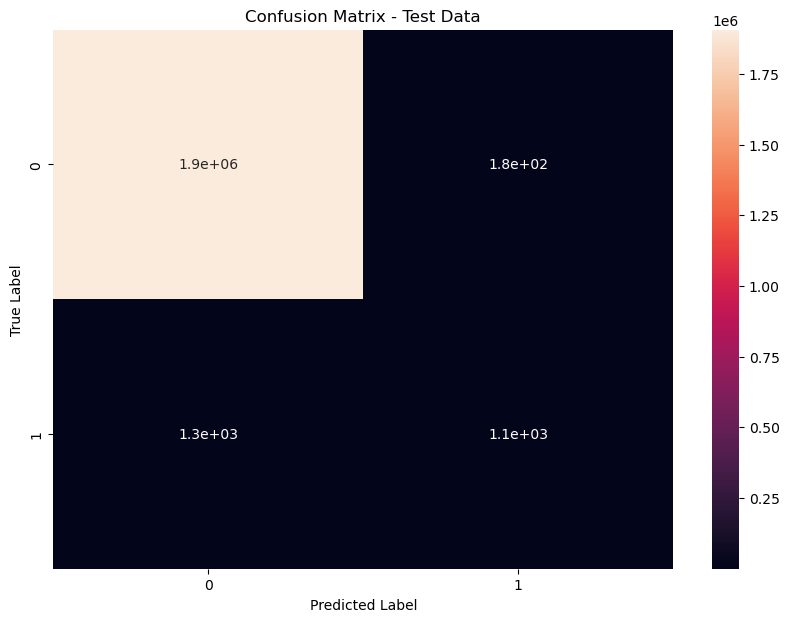

In [29]:
import seaborn as sn

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

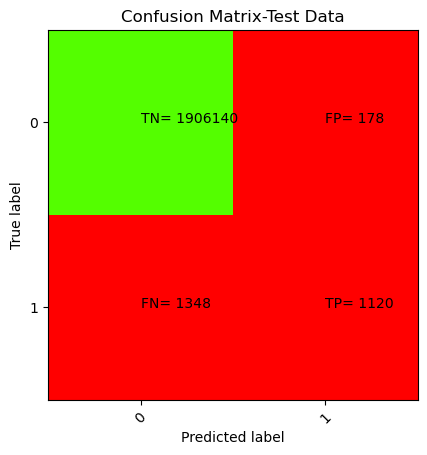

In [54]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.prism)
classNames = ['0','1']
plt.title('Confusion Matrix-Test Data')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(2)
plt.xticks(tick_marks,classNames,rotation=45)
plt.yticks(tick_marks,classNames)
s = [['TN','FP'],['FN','TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i,str(s[i][j])+"= "+str(cm[i][j]))
plt.show()

In [32]:
#Calculate common error metrics for a 2-class classifier
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906318
           1       0.86      0.45      0.59      2468

    accuracy                           1.00   1908786
   macro avg       0.93      0.73      0.80   1908786
weighted avg       1.00      1.00      1.00   1908786



In [31]:
# Calculate metrics values individually

# Assigning Variables for convinience

TN = cm[0][0]
FP = cm[0][1]
FN = cm[1][0]
TP = cm[1][1]

In [33]:
recall = TP / (TP + FN )
print("Recall= ",recall)

Recall=  0.4538087520259319


In [34]:
precision = TP / (TP + FP)
print("Precision=",precision)

Precision= 0.8628659476117103


In [35]:
specificity = TN /  (TN + FP)
print("Specificity = ", specificity)

Specificity =  0.9999066262816592


In [36]:
accuracy = ( TP + TN ) / ( TP + TN + FP + FN)
print("Accuracy =" , accuracy)

Accuracy = 0.9992005389813211
